In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [5]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:>

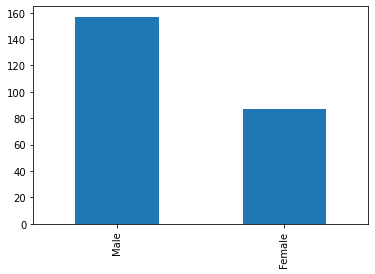

In [6]:
tips['sex'].value_counts().plot(kind='bar')


In [7]:
tips['sex'].value_counts(normalize='true')

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [8]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
tips['day'].value_counts(normalize='true')

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

<AxesSubplot:>

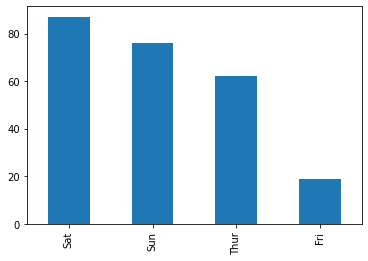

In [10]:
tips['day'].value_counts().plot(kind='bar')

In [11]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [12]:
tips['time'].value_counts(normalize='true')

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

<AxesSubplot:>

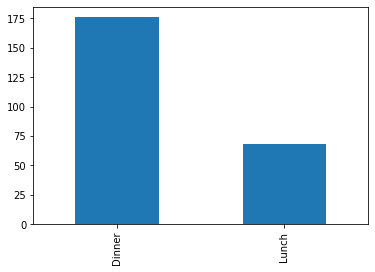

In [13]:
tips['time'].value_counts().plot(kind='bar')

# Bivariate Analysis

In [14]:
#Lets find which time of the day has the highest average tips by comparing time and tip variables

In [15]:
tips[['time', 'tip']]

,time,tip
0,Dinner,1.01
1,Dinner,1.66
2,Dinner,3.50
3,Dinner,3.31
4,Dinner,3.61
...,...,...
239,Dinner,5.92
240,Dinner,2.00
241,Dinner,2.00
242,Dinner,1.75


In [16]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

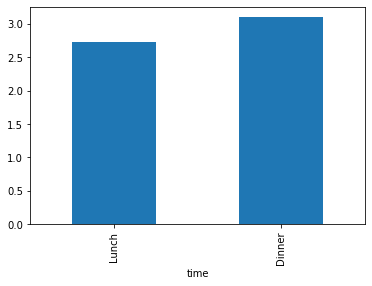

In [17]:
tips.groupby(['time'])['tip'].mean().plot(kind='bar')

In [18]:
#Lets find out which sex gives more tip by comparing tip and sex variables

In [19]:
tips[['sex', 'tip']]

,sex,tip
0,Female,1.01
1,Male,1.66
2,Male,3.50
3,Male,3.31
4,Female,3.61
...,...,...
239,Male,5.92
240,Female,2.00
241,Male,2.00
242,Male,1.75


In [20]:
tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

<AxesSubplot:xlabel='sex'>

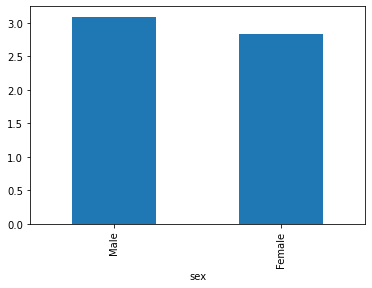

In [21]:
tips.groupby(['sex'])['tip'].mean().plot(kind='bar')

In [22]:
#Lets find out which day has the highest average tip by comparing day and tip variables

In [23]:
tips.groupby(['day'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

<AxesSubplot:xlabel='day'>

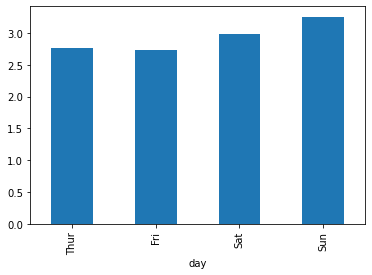

In [24]:
tips.groupby(['day'])['tip'].mean().plot(kind='bar')

In [25]:
#Lets compare sex and day to find out which days the diff sex prefers

In [26]:
tips.groupby(['sex'])['day'].value_counts()

sex     day 
Male    Sat     59
        Sun     58
        Thur    30
        Fri     10
Female  Thur    32
        Sat     28
        Sun     18
        Fri      9
Name: day, dtype: int64

In [27]:
#Lets find out which sex has the highest average smokers by comparing sex and smoker variables

In [28]:
tips.groupby(['sex'])['smoker'].value_counts()

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: smoker, dtype: int64

<AxesSubplot:xlabel='sex,smoker'>

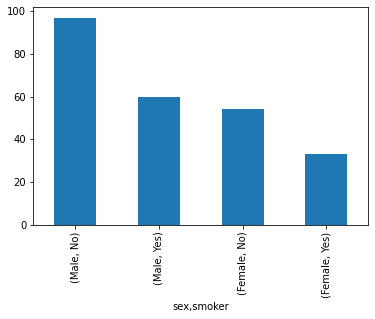

In [29]:
tips.groupby(['sex'])['smoker'].value_counts().plot(kind='bar')

In [30]:
#Lets find out the sex and average tip of smokers and non smokers by using cross table

In [31]:
tips.groupby(['smoker', 'sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

In [32]:
#Lets put it in a better structure

In [33]:
tips.groupby(['smoker', 'sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


<AxesSubplot:xlabel='smoker'>

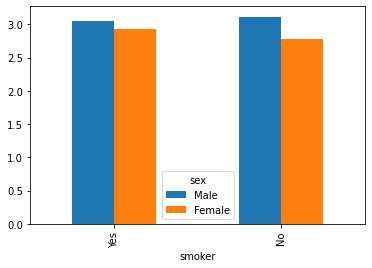

In [34]:
tips.groupby(['smoker', 'sex'])['tip'].mean().unstack().plot(kind='bar')

In [35]:
#Lets find out that for smoker and day by using cross table

In [36]:
tips.groupby(['smoker', 'day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,3.030000,2.7140,2.875476,3.516842
No,2.673778,2.8125,3.102889,3.167895


<AxesSubplot:xlabel='smoker'>

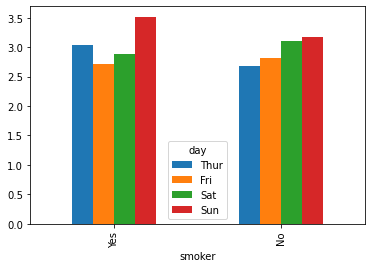

In [37]:
tips.groupby(['smoker', 'day'])['tip'].mean().unstack().plot(kind='bar')

In [38]:
#Lets compare for size and day by using cross table

In [39]:
tips.groupby(['day', 'size'])['tip'].mean().unstack()

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


<AxesSubplot:xlabel='day'>

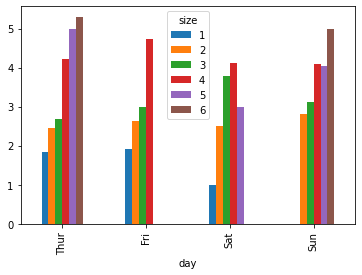

In [40]:
tips.groupby(['day', 'size'])['tip'].mean().unstack().plot(kind = 'bar')

In [41]:
#Lets compare for smoker and size by using cross table

In [42]:
tips.groupby(['smoker','size'])['tip'].mean().unstack()

size,1,2,3,4,5,6
smoker,,,,,,
Yes,1.460,2.709545,4.095000,3.992727,2.500000,NaN
No,1.415,2.489000,3.069231,4.195769,5.046667,5.225


<AxesSubplot:xlabel='smoker'>

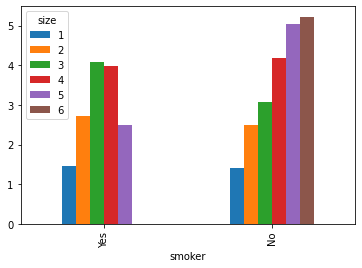

In [43]:
tips.groupby(['smoker','size'])['tip'].mean().unstack().plot(kind='bar')

In [44]:
#Lets find the percentage of tip to total bill by creating a new column perc_tip

In [45]:
tips['perc_tip'] = tips['tip']/tips['total_bill'] * 100

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,perc_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [47]:
#Lets compare tip percentage with sex and smoker variable to find more insight

In [48]:
tips.groupby(['sex', 'smoker'])['perc_tip'].mean().unstack()

smoker,Yes,No
sex,,
Male,15.277118,16.066872
Female,18.215035,15.692097


In [49]:
#Lets compare tip percentage with sex and day variable to find more insight

In [50]:
tips.groupby(['sex', 'day'])['perc_tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
sex,,,,
Male,16.527649,14.338519,15.157684,16.234407
Female,15.752483,19.938840,15.647021,18.156877


In [51]:
#Lets compare tip percentage with time and size variable to find more insight

In [52]:
tips.groupby(['time', 'size'])['perc_tip'].mean().unstack()

size,1,2,3,4,5,6
time,,,,,,
Lunch,20.275206,16.574967,15.322597,14.551515,12.138869,17.370592
Dinner,23.183197,16.570395,15.199487,14.601680,14.652219,10.379905


In [53]:
#Lets visualize the relationship between total bill and tip

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

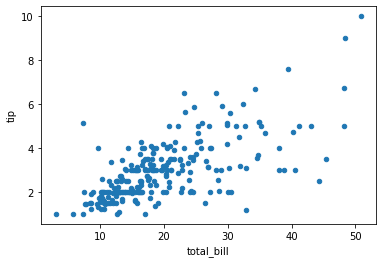

In [54]:
tips.plot.scatter(x='total_bill', y='tip')

In [55]:
#from the visualization above it is obvious that the tips keeps increasing as total bill increases. 
#There are some few outliers though. For example, one datapoint with a total_bill of about 33 gave a tip of about 1.4 which
#obviously is not in line with the pattern projected strongly by most of the data point. 

In [56]:
#lets visualize the relationship again using seaborn library 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

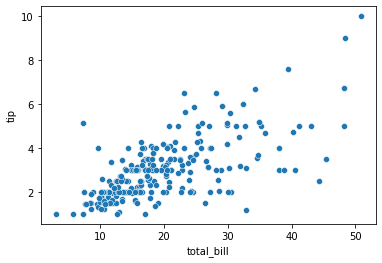

In [57]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

In [58]:
#sns library gives a better look and feel visyalization effect clearly demonstrated on the borders of the 
#densed areas of the data plots

In [59]:
#Lets add a third variable for deeper comparison using sns library

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

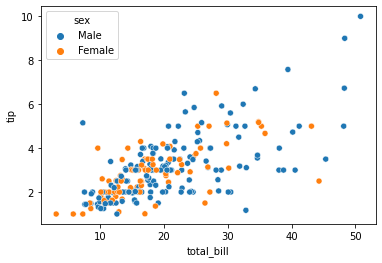

In [60]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)

In [61]:
#From the above its can be said that Males gives more tips than females, and majority of the data polpulation are males

In [62]:
#Lets check that of time as the third variable

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

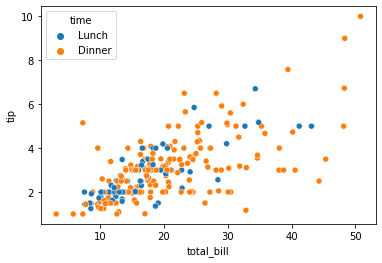

In [63]:
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)

In [64]:
#Visual above shows that people pay more tips at dinner time as compared to lunch time

In [65]:
#Now lets create bifurcation of time based on the chart above based on the column sex

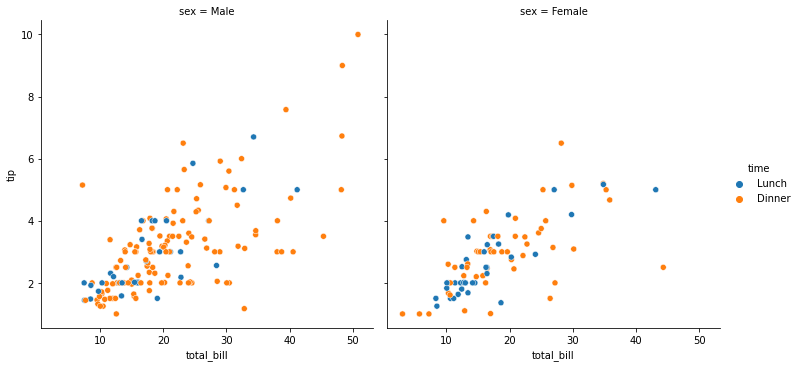

In [66]:
sns.relplot(x='total_bill', y='tip', hue='time', data=tips, col='sex')

In [67]:
#Lets also look at the distribution of the total_bill by time

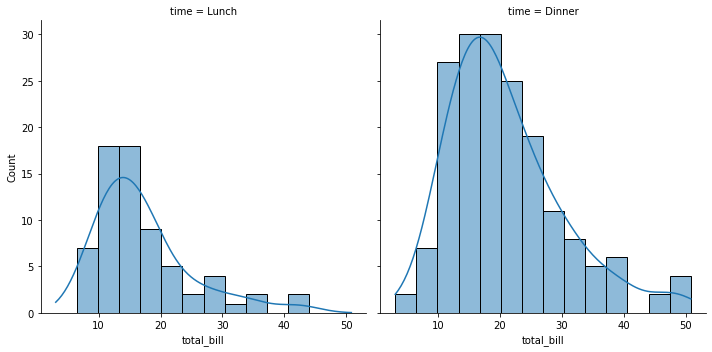

In [68]:
sns.displot(data=tips, x='total_bill', col='time', kde=True)

In [69]:
#From the chart above we can deduce that they are more sales at dinner time as compared to lunch time

In [70]:
#Lets look at the distribution of tips by time too

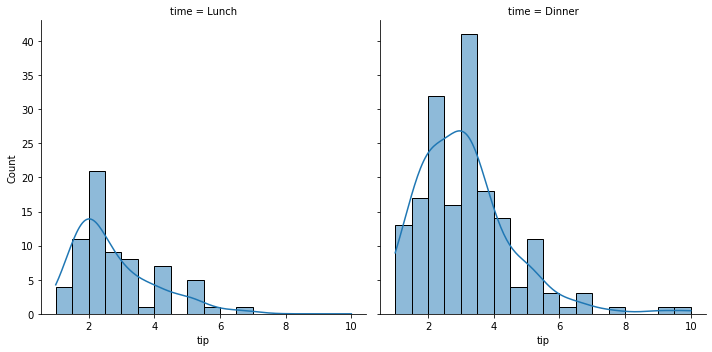

In [71]:
sns.displot(data=tips, x='tip', col='time', kde=True)

In [72]:
#Left skewed chart clearly illustrated by the help of kde revealing that there are more tips at dinner time

In [73]:
#Finally lets create correlation and distribution for all the numeric variables by sex

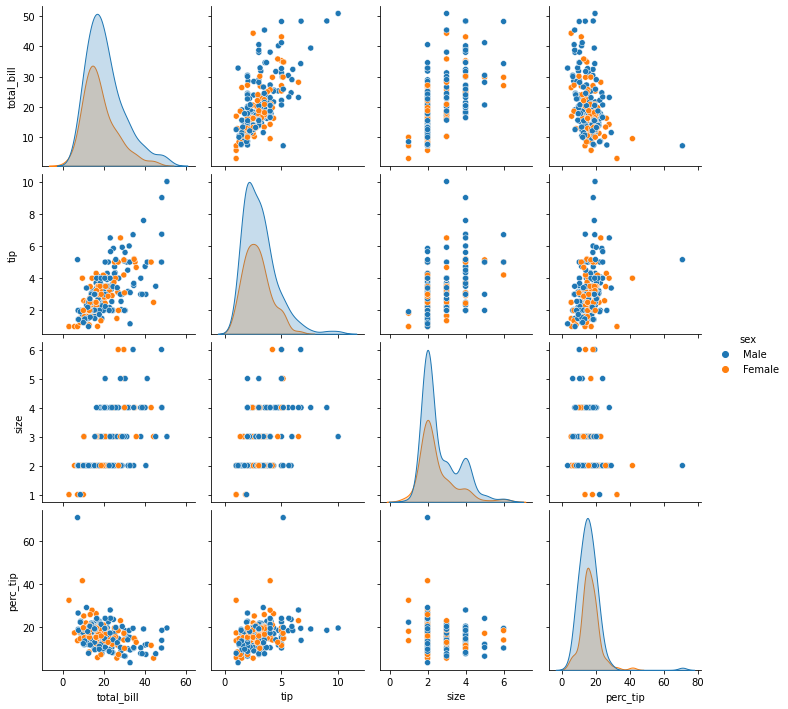

In [74]:
sns.pairplot(data=tips, hue='sex')